# Salary Prediction
- [The Adult Salary Prediction dataset](https://archive.ics.uci.edu/ml/datasets/adult) consists of data from the 1994 US Census and the task is to predict whether a person earns `over $50K` a year (Class 1) or `less than $50K` a year (Class 0). The columns in the dataset are as follows:

|col name|description|
|:--|:--|
|age| continuous.|
|workclass| Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.|
|fnlwgt| continuous.|
|education| Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.|
|education-num| continuous.|
|marital-status| Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.|
|occupation| Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.|
|relationship| Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.|
|race| White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.|
|sex| Female, Male.|
|capital-gain| continuous.|
|capital-loss| continuous.|
|hours-per-week| continuous.|
|native-country| United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.|
|target| This is the target variable to be predicted. Class 1 for salary >50K and class 0 for salary <=50K|

- The goal of this project is to build and tune a model to predict the `target` column using AWS Sagemaker and deploy the model as a `Serverless Inference Endpoint`

## Tips: 
- You can use the below code to get the S3 bucket to write any artifacts to
    ```
    import sagemaker
    session = sagemaker.Session()
    bucket = session.default_bucket()
    ```
- Are all the columns necessary or we can drop any?
- What ML task is this? Classification? Regression? Clustering?
- How to determine the best hyperparameters for the model?
- How to test if the model is deployed successfully?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

cols = [
    "age", 
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "salary"
]

In [2]:
train_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names=cols)
test_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", names=cols, skiprows=1)

train_df["salary"] = train_df["salary"].apply(lambda x: 1 if ">50K" in x else 0)
test_df["salary"] = test_df["salary"].apply(lambda x: 1 if ">50K" in x else 0)

print(train_df.shape, test_df.shape)
train_df.head()

(32561, 15) (16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


## All the best!
Get started below...

In [3]:
train_df.shape

(32561, 15)

In [4]:
train_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


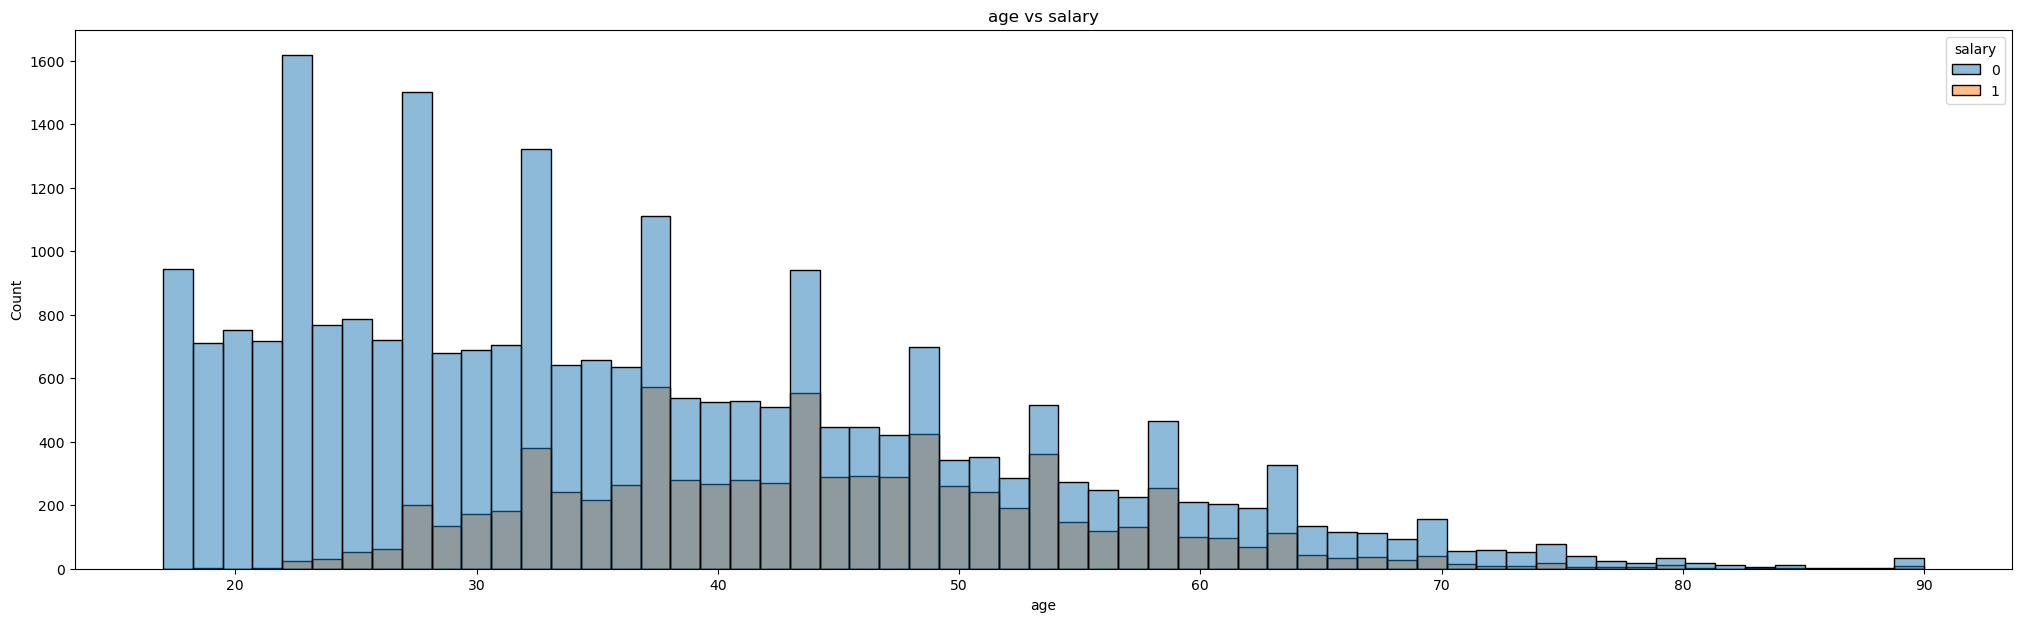

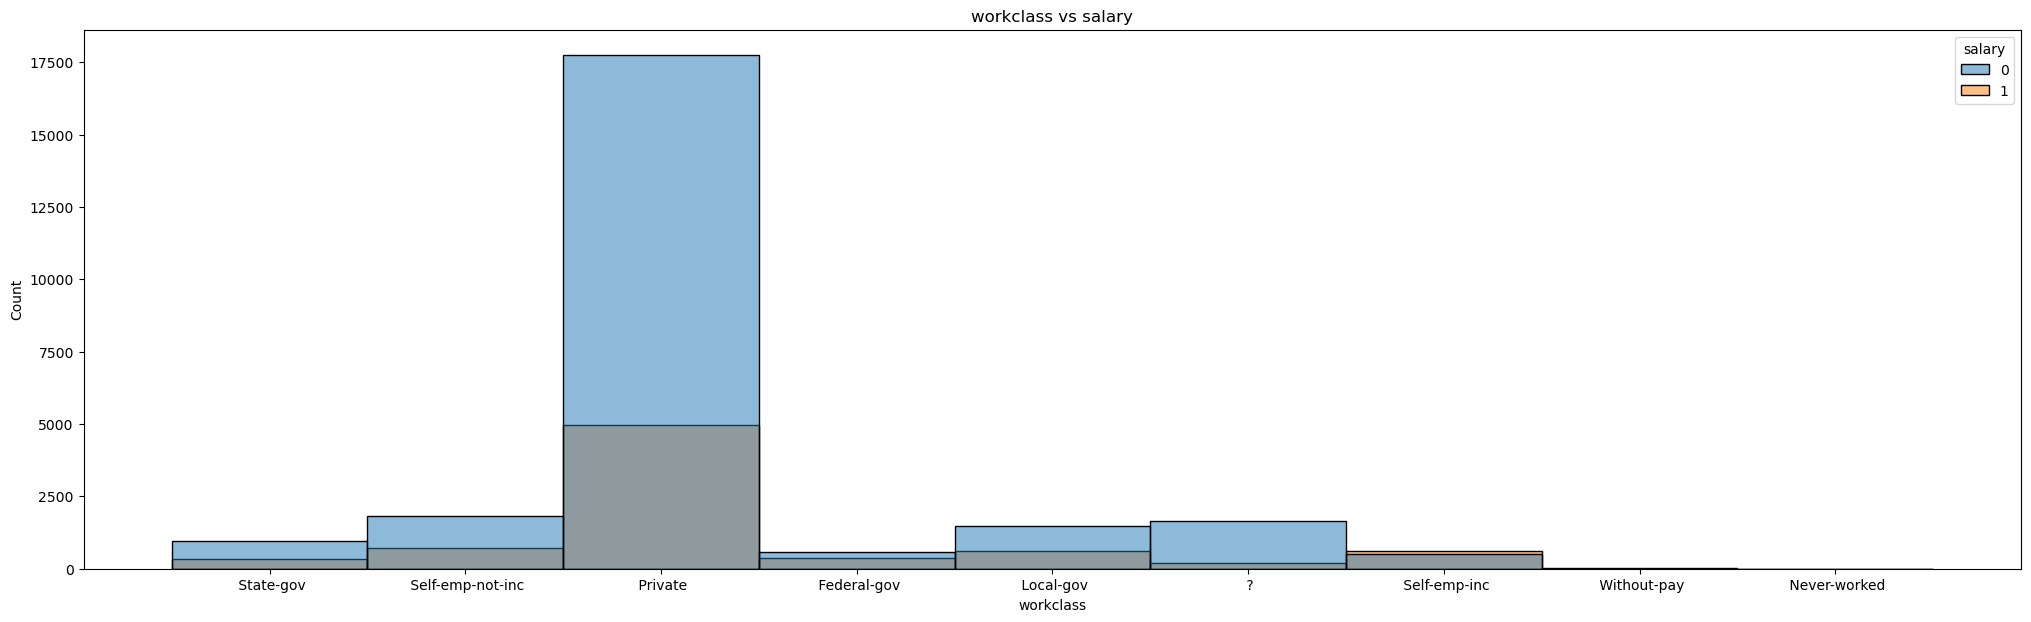

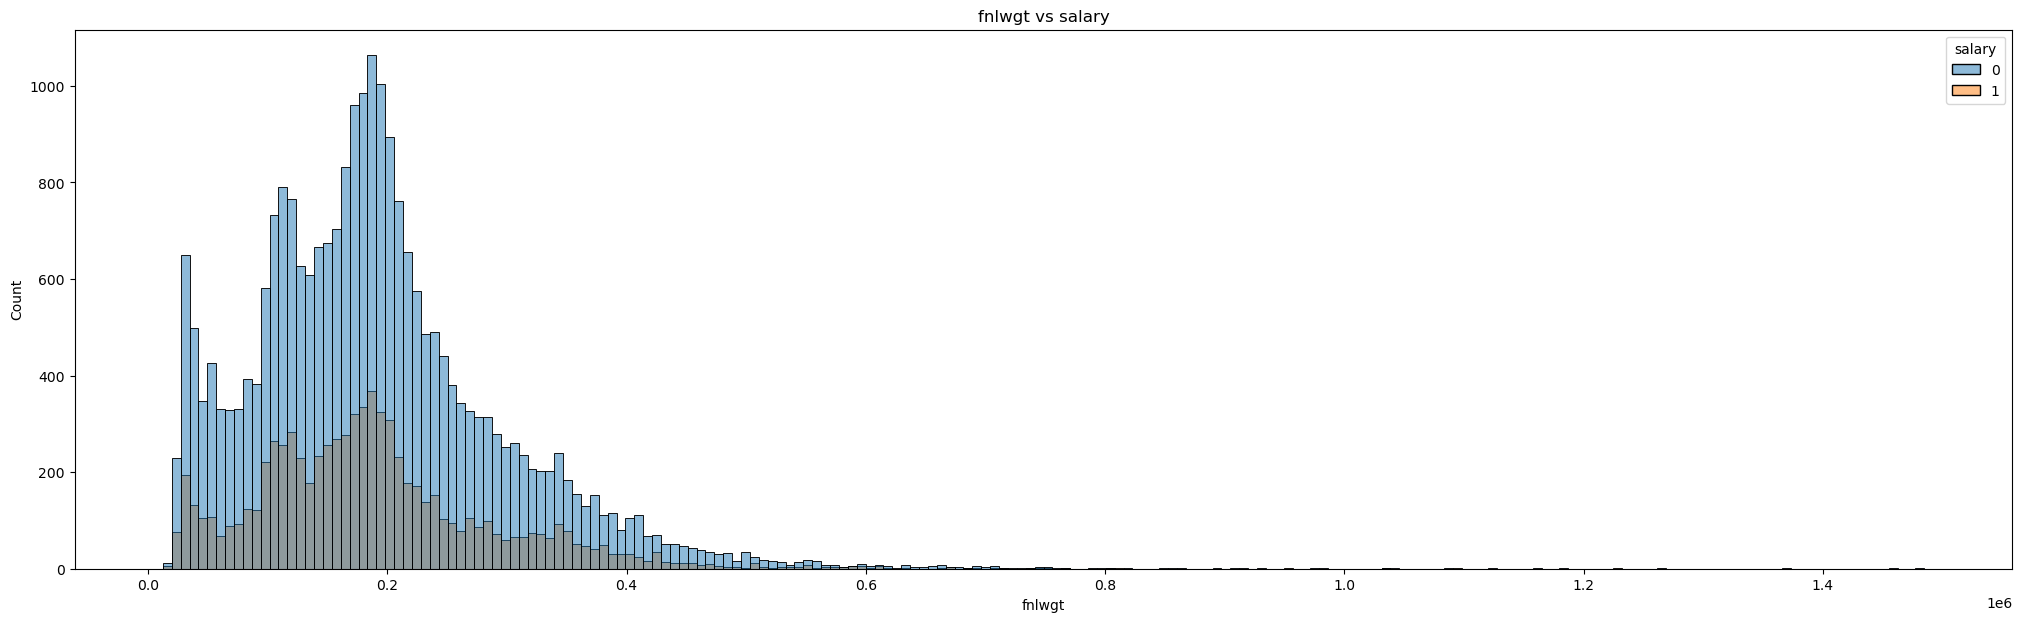

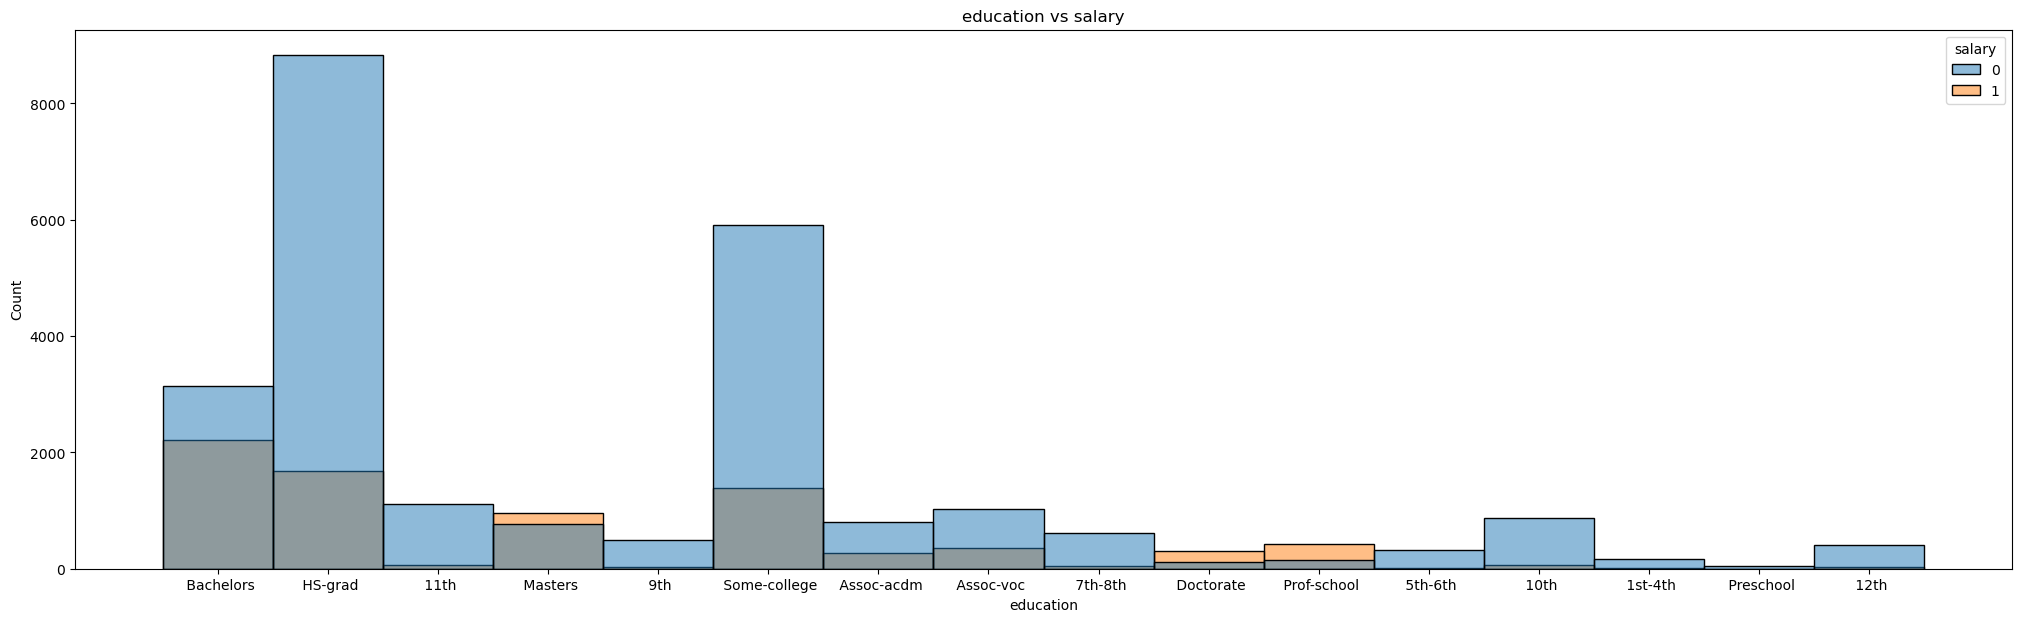

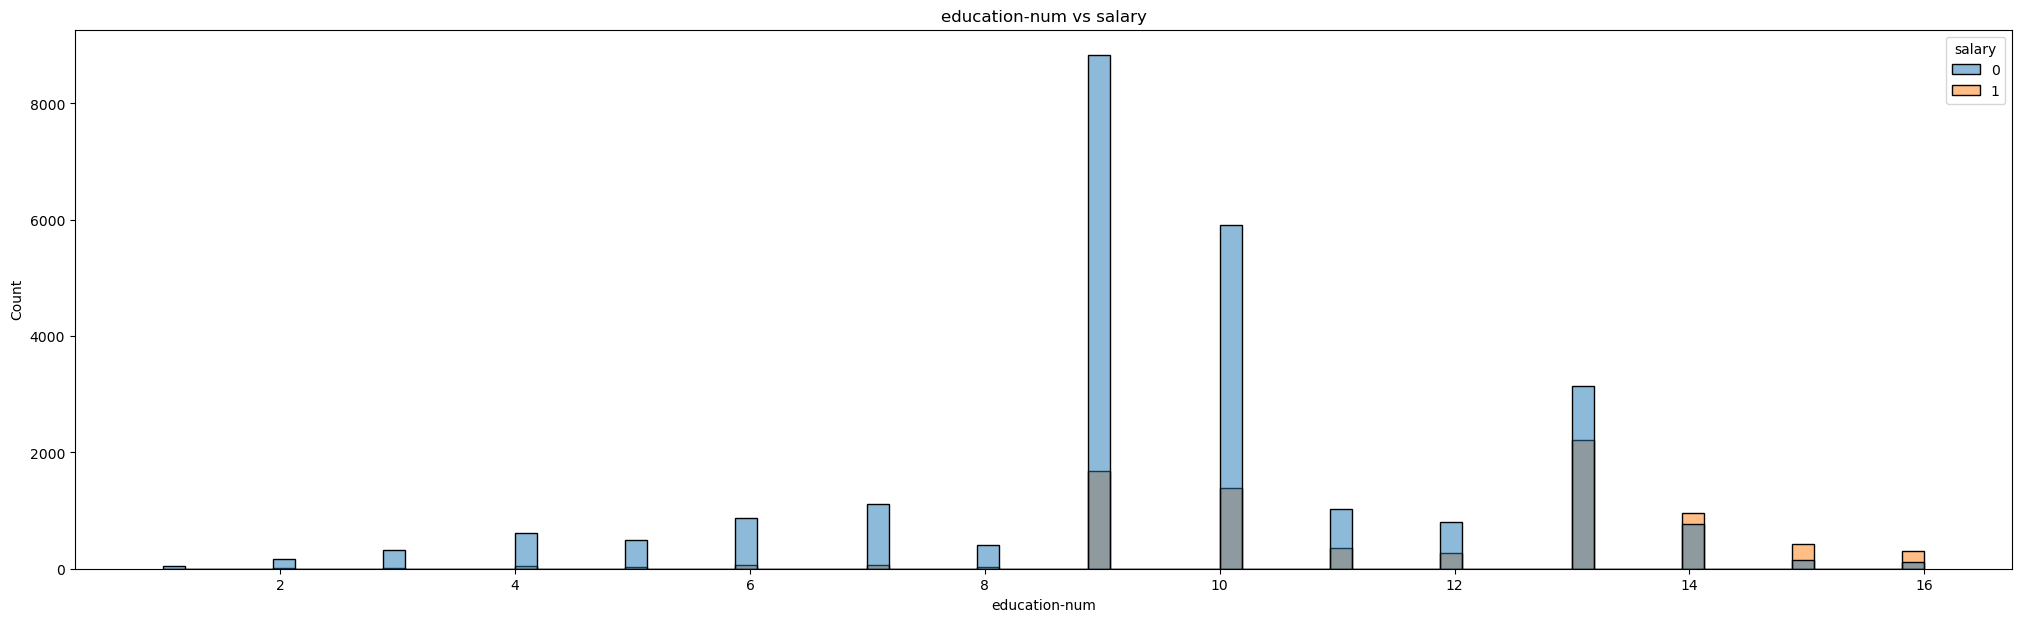

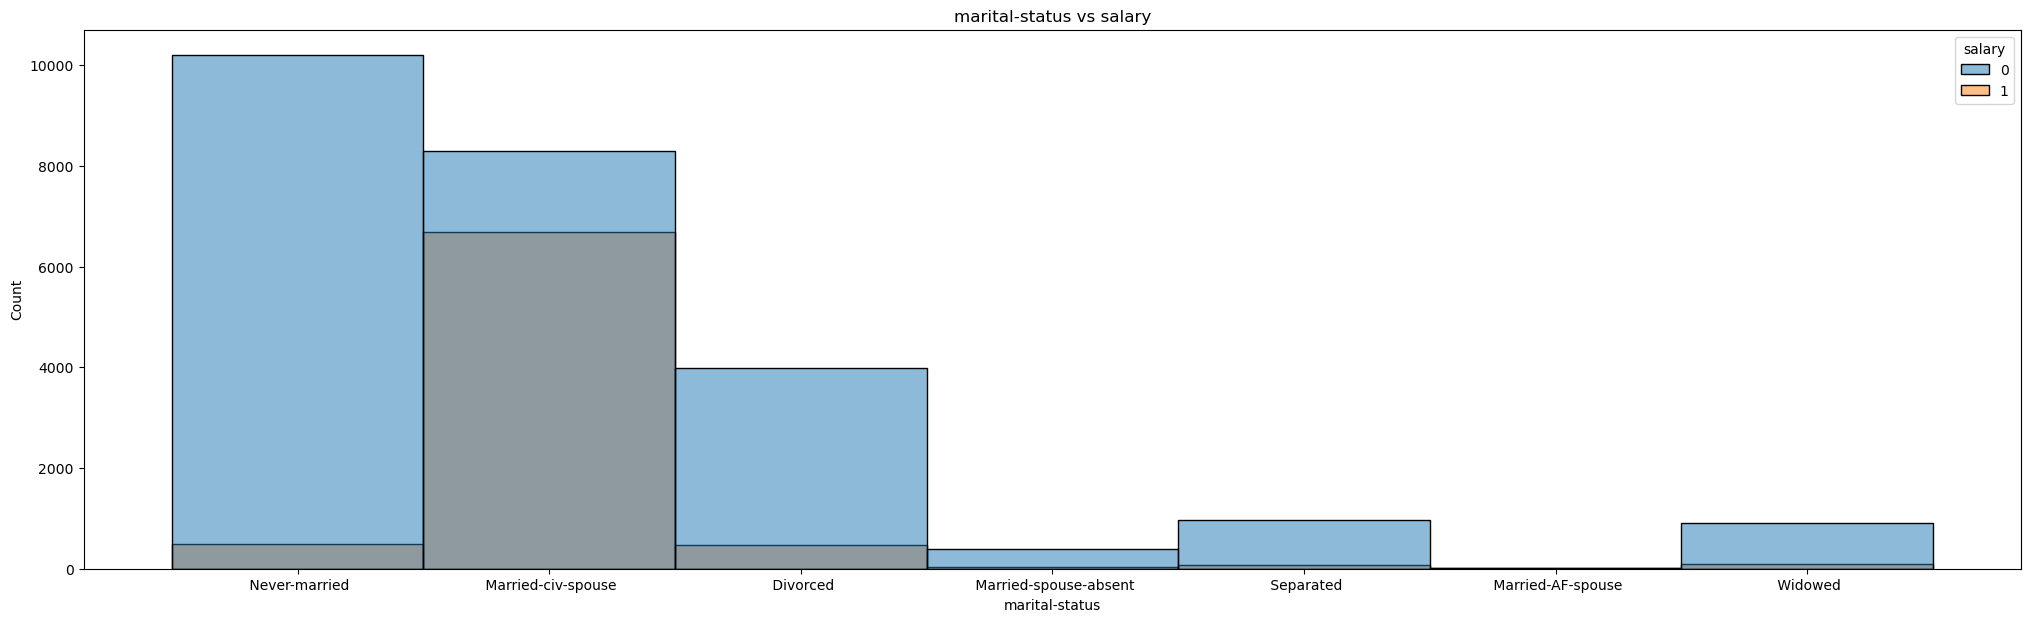

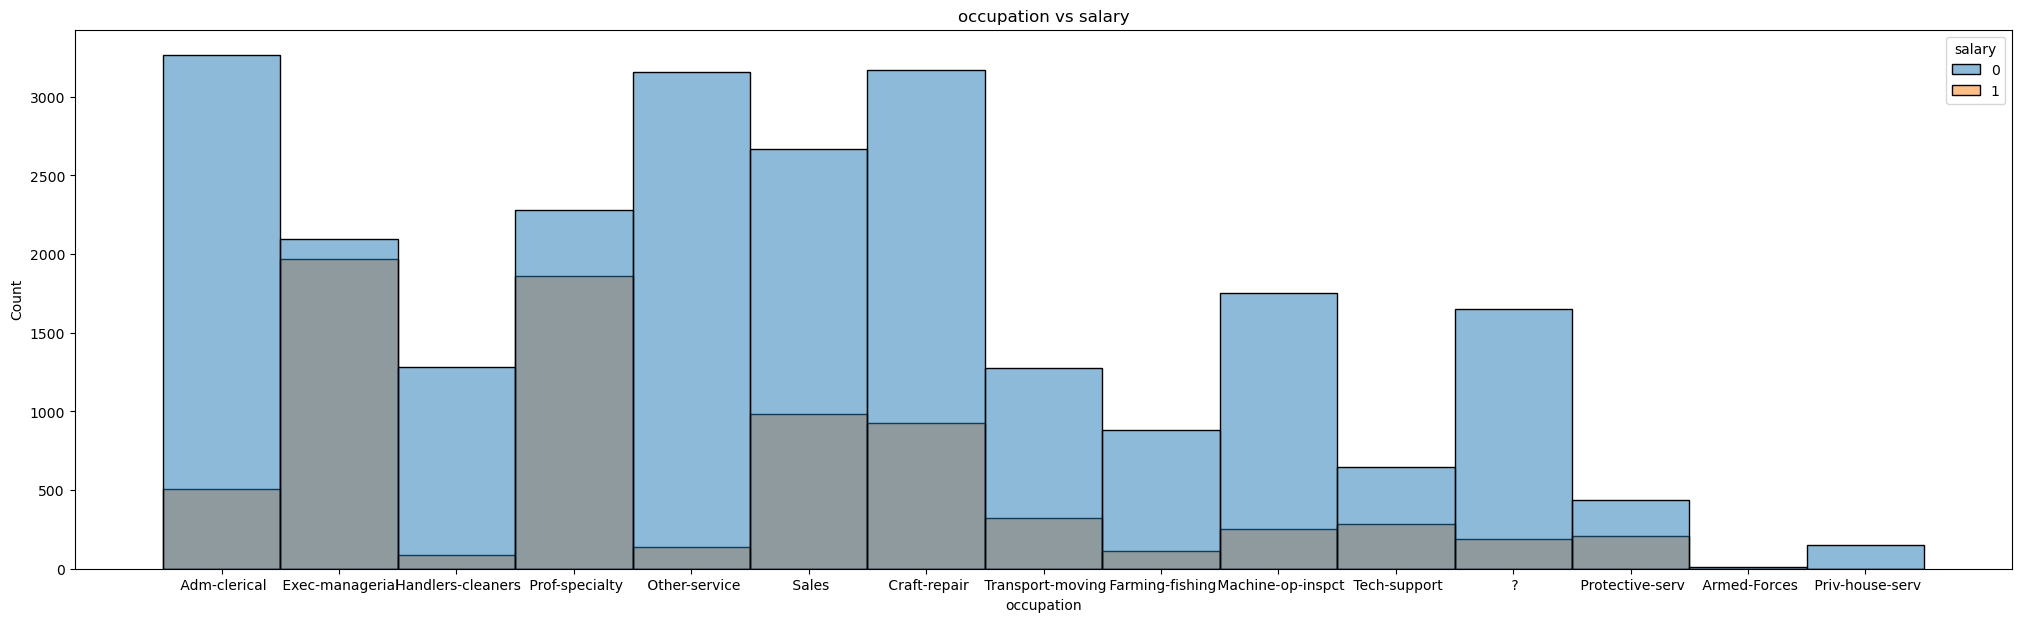

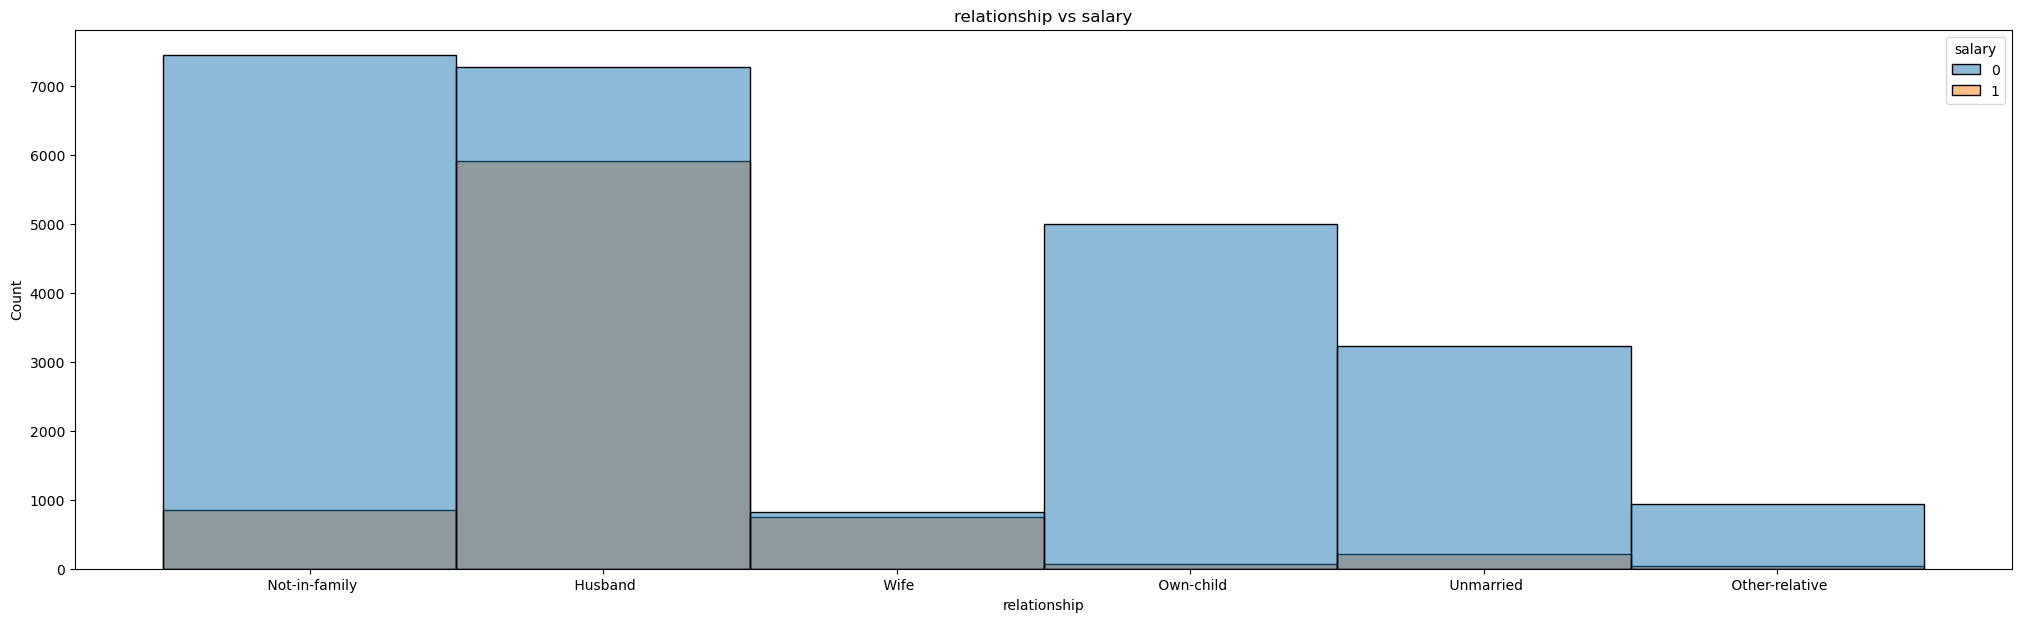

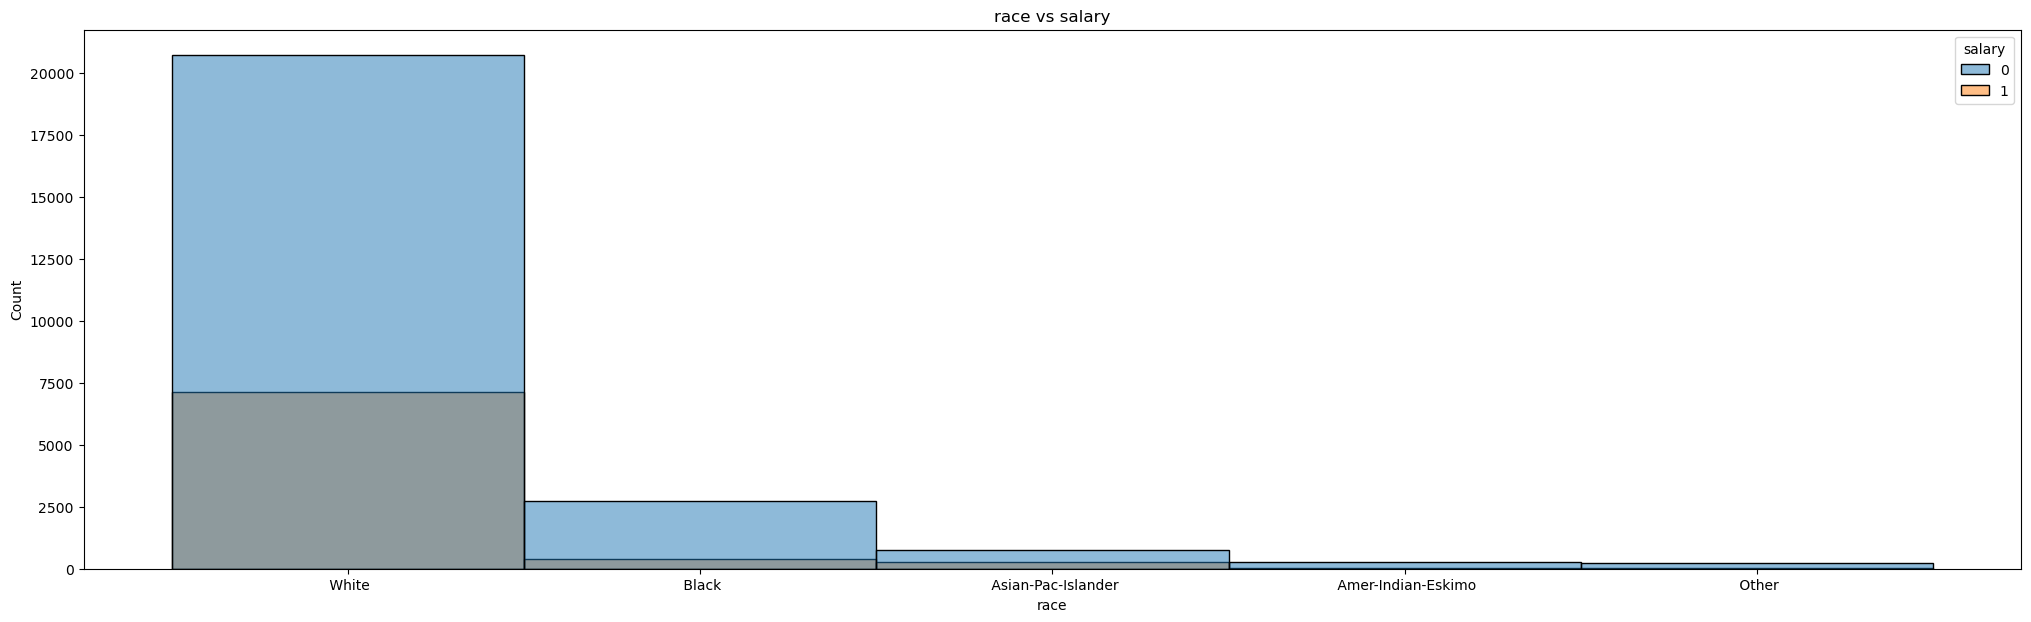

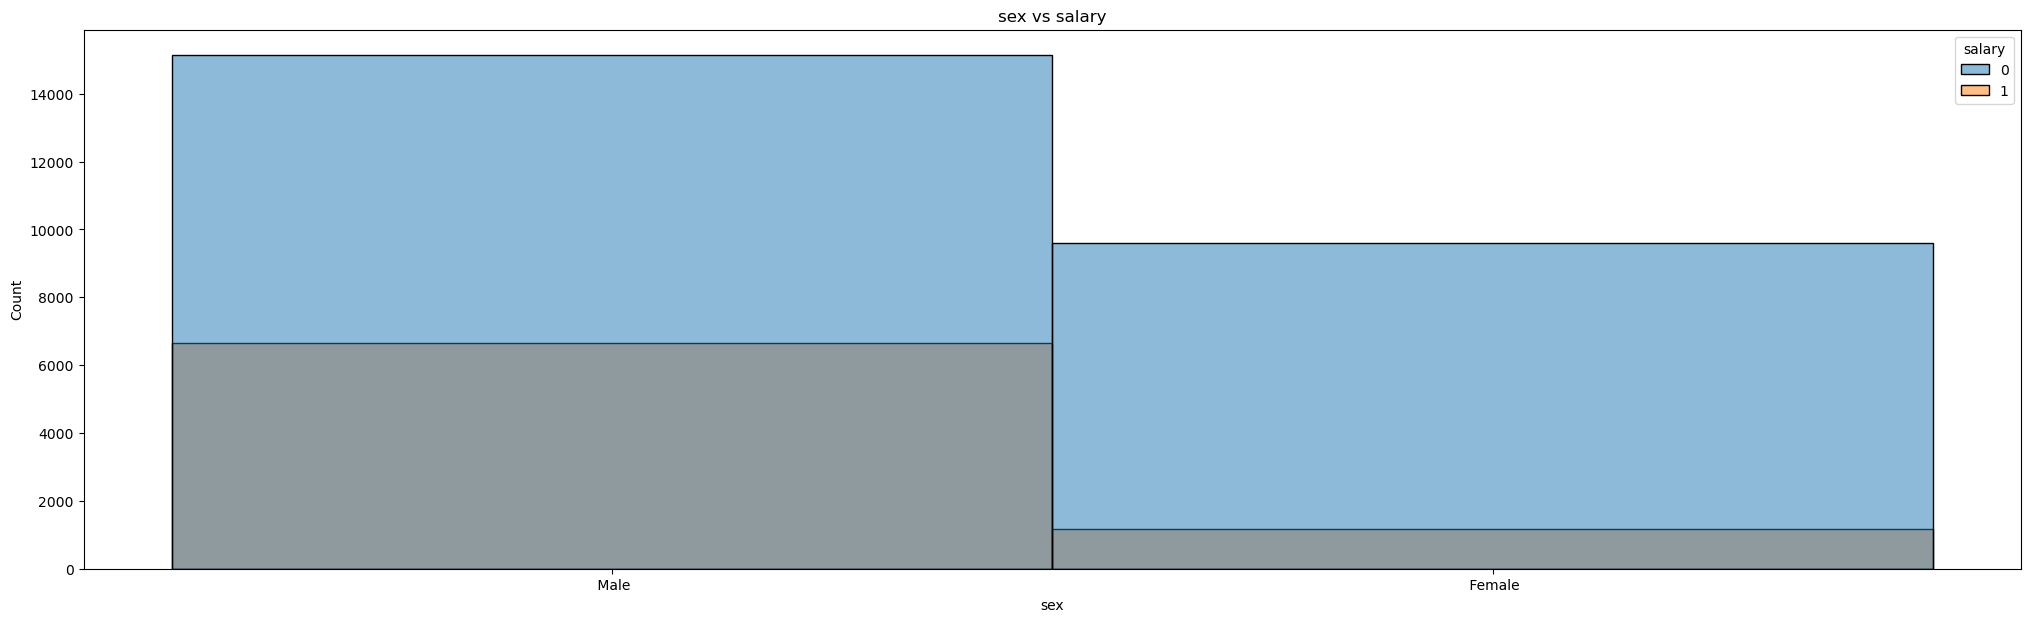

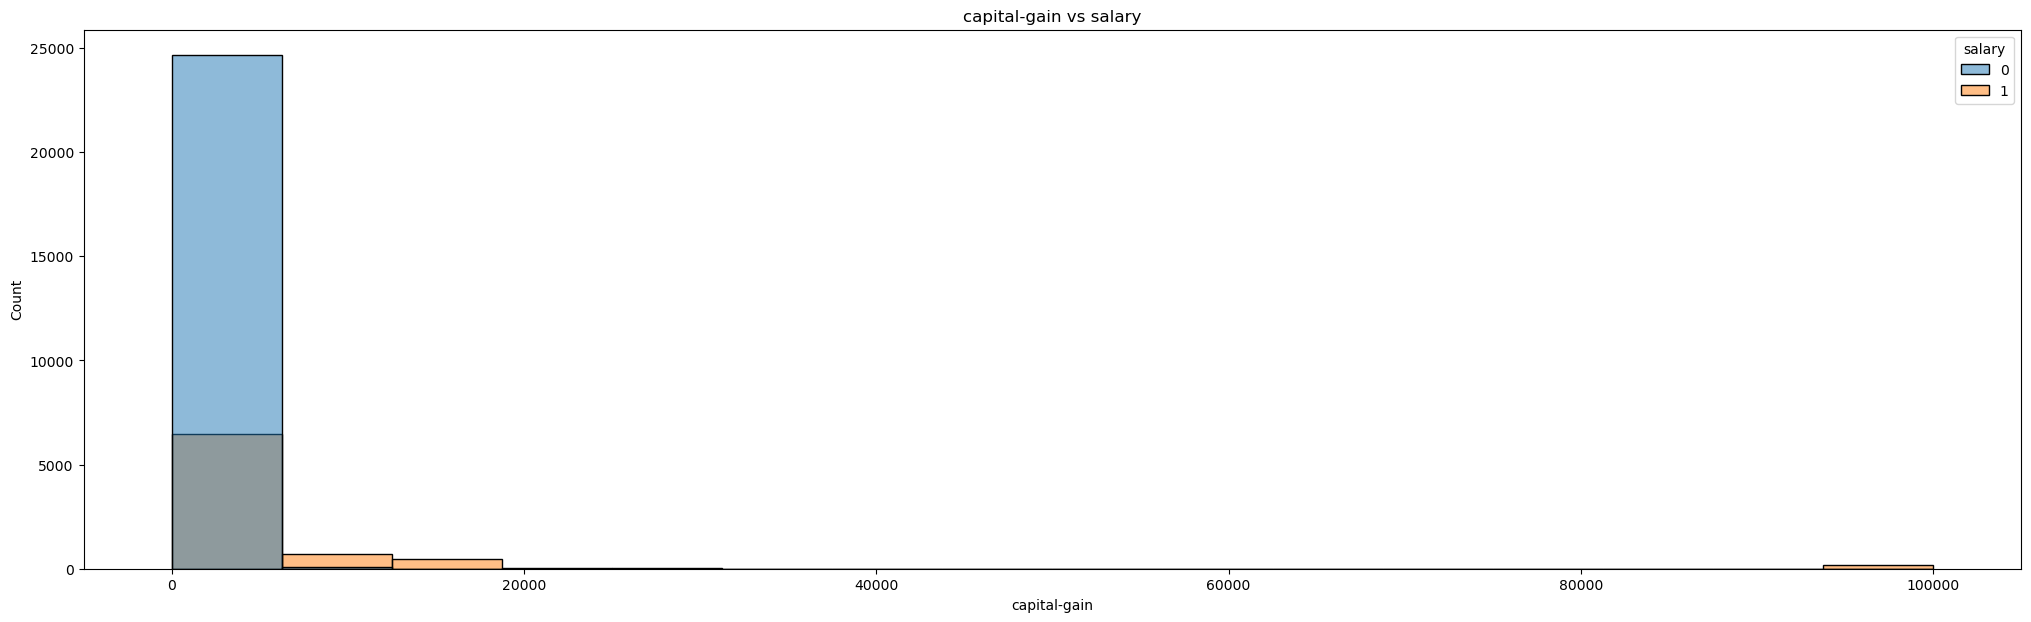

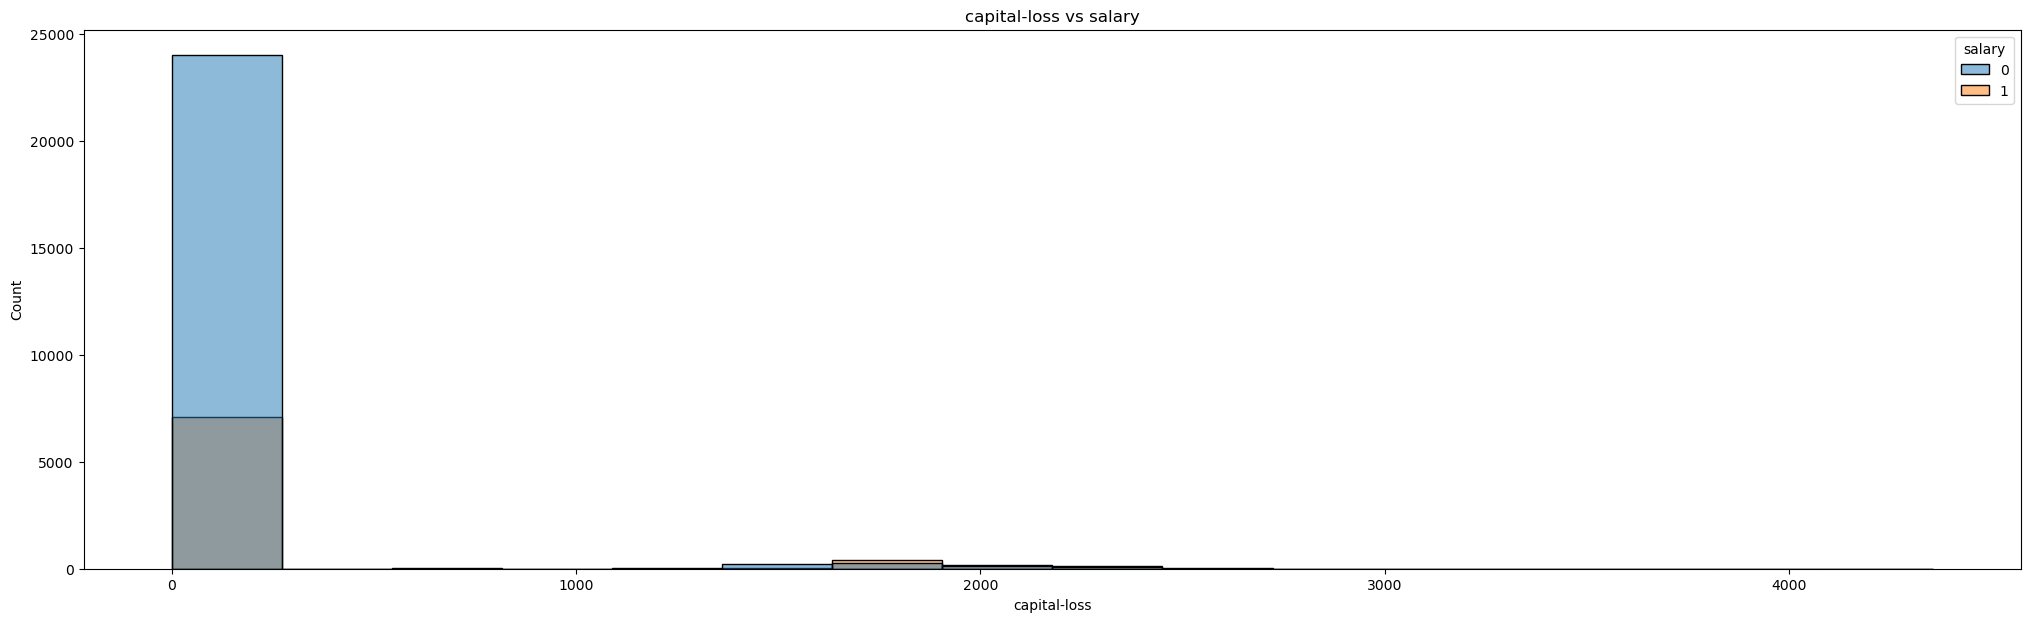

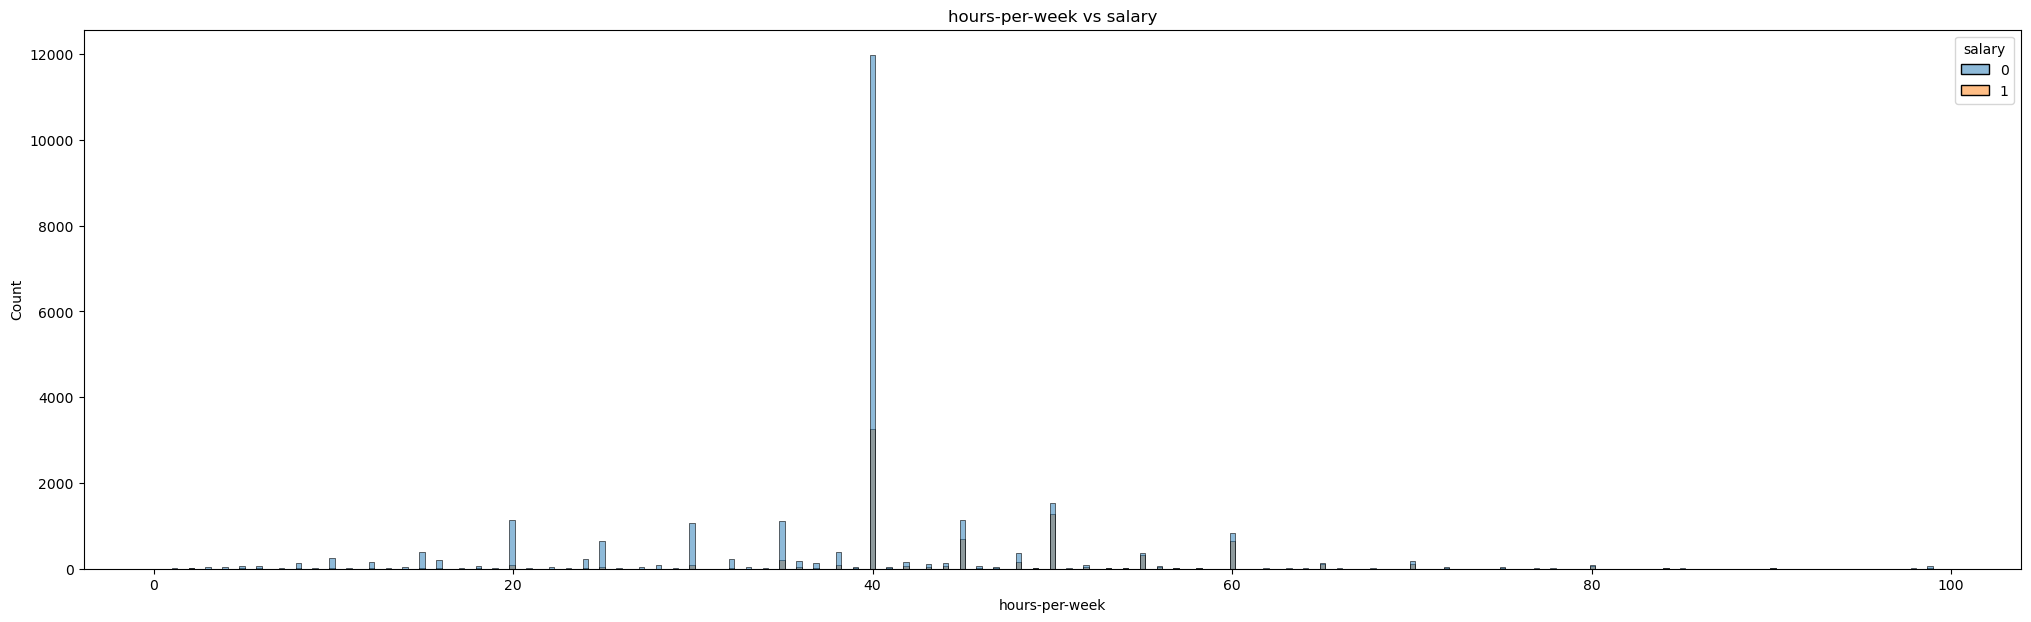

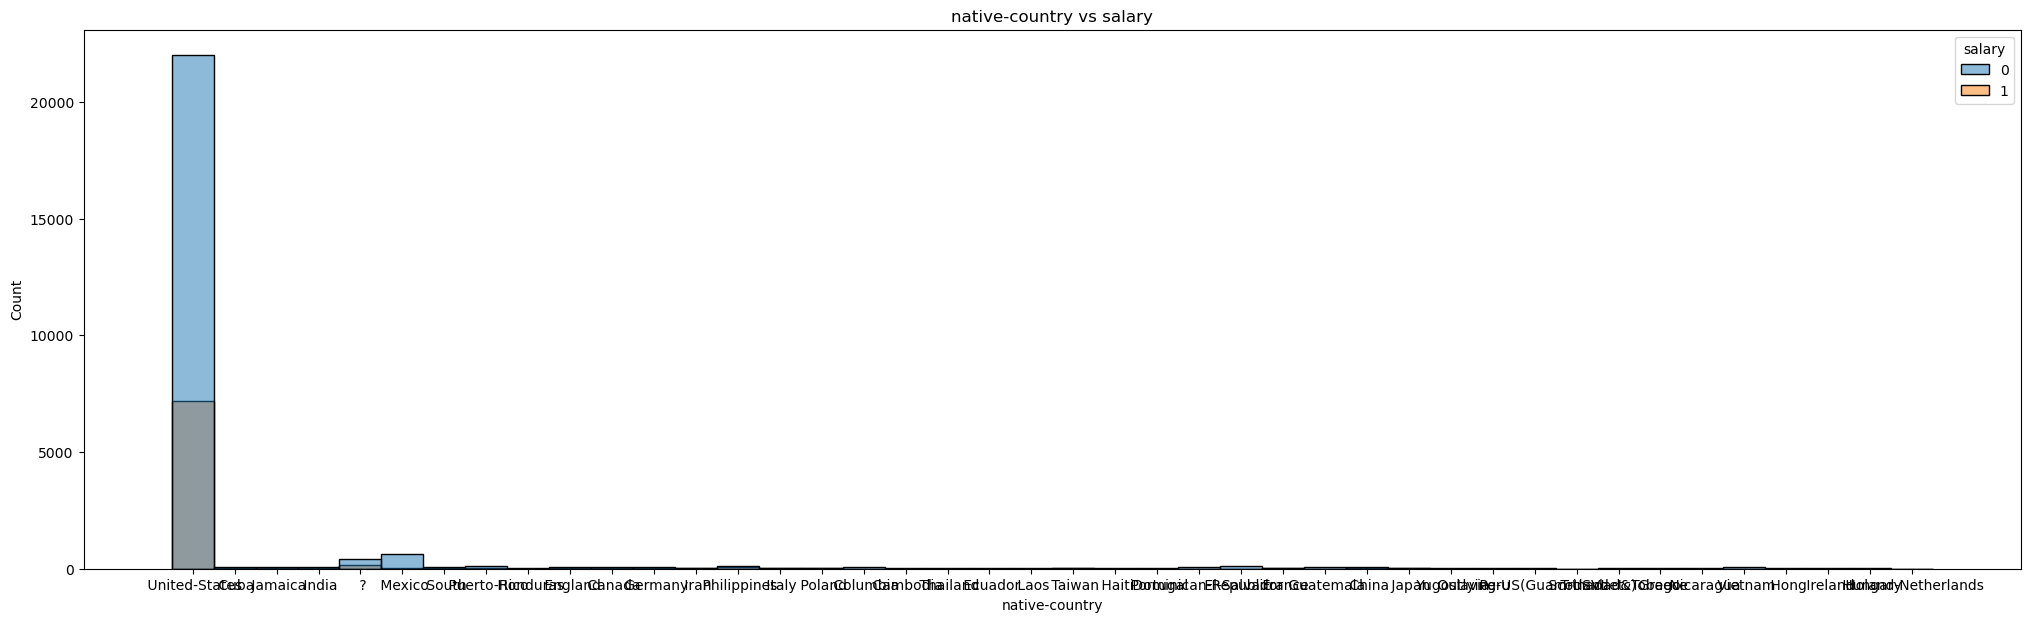

In [6]:
for col in train_df.columns:
    if(col != 'salary'):
        plt.figure(figsize=(25,7))
        plt.title(col + ' vs salary')
        sns.histplot(data=train_df,x=col,hue='salary')
        plt.show()

<Figure size 1500x200 with 0 Axes>

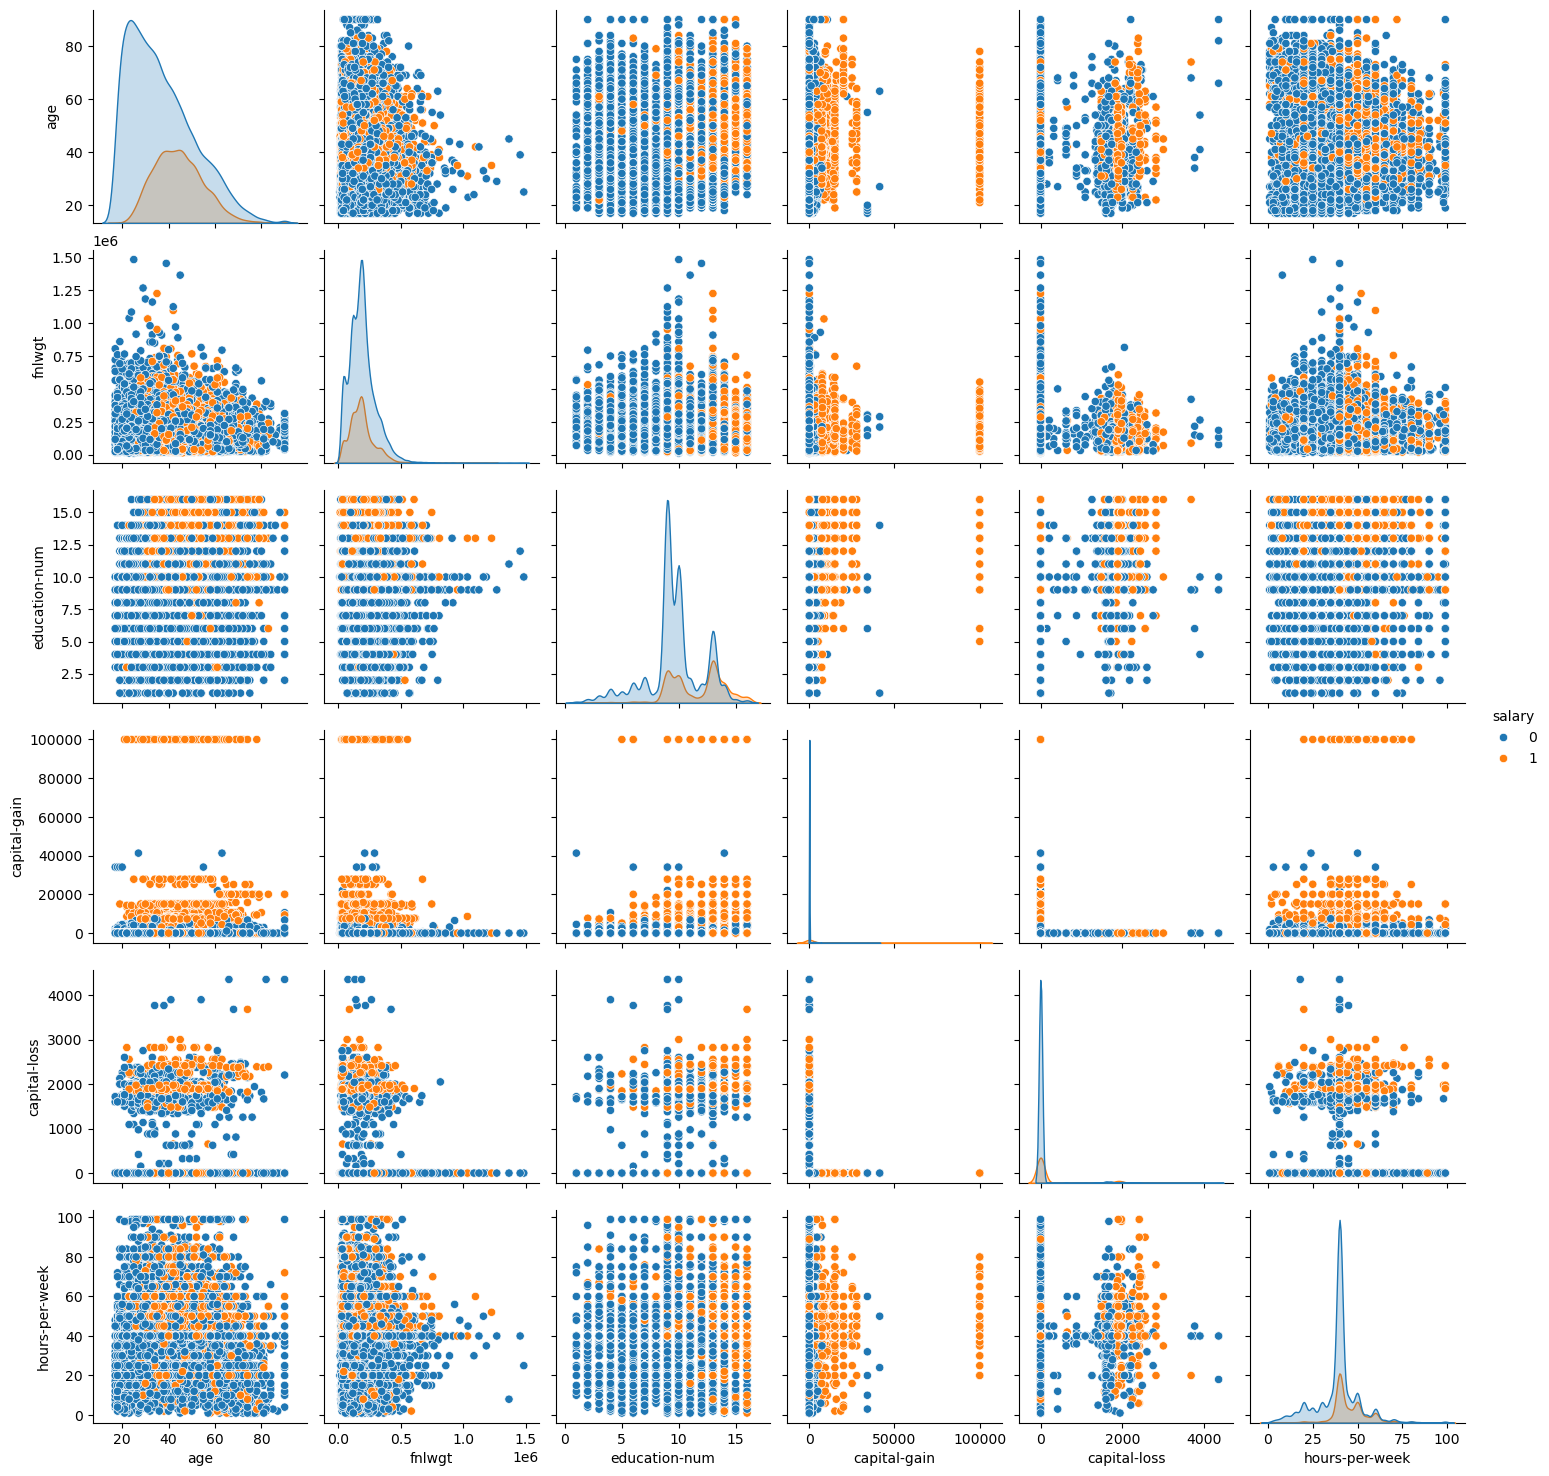

In [8]:
plt.figure(figsize=(15,2))
sns.pairplot(train_df[[col for col in train_df.columns]],hue='salary')
plt.show()

In [9]:
#Checking the count of the missing values percentage, there are no missing values there in the dataset
train_df.isnull().sum()/len(train_df)*100

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
salary            0.0
dtype: float64

In [10]:
# Separating the numerical and categorical columns
from sklearn.preprocessing import StandardScaler
def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(train_df)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    """
    Generates a list of binary columns in a dataframe.
    """
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(train_df)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(dataset, categorical):
    """
    Function to automate the process of encoding the categorical data
    :param dataset: Dataframe
    :param categorical: List of categorical columns
    :return: Dataframe
    """
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

dataset = encoding(train_df, categorical)

def feature_scaling(dataset, numerical):
    """
    Function to automate the process of feature scaling the numerical data
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :return: Dataframe
    """
    sc_x = StandardScaler()
    dataset[numerical] = sc_x.fit_transform(dataset[numerical])
    return dataset

dataset = feature_scaling(train_df, numerical)

In [11]:
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.030671,7,-1.063611,9,1.134739,4,1,1,4,1,0.148453,-0.21666,-0.035429,39,0
1,0.837109,6,-1.008707,9,1.134739,2,4,0,4,1,-0.145920,-0.21666,-2.222153,39,0
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,4,1,-0.145920,-0.21666,-0.035429,39,0
3,1.057047,4,0.425801,1,-1.197459,2,6,0,2,1,-0.145920,-0.21666,-0.035429,39,0
4,-0.775768,4,1.408176,9,1.134739,2,10,5,2,0,-0.145920,-0.21666,-0.035429,5,0


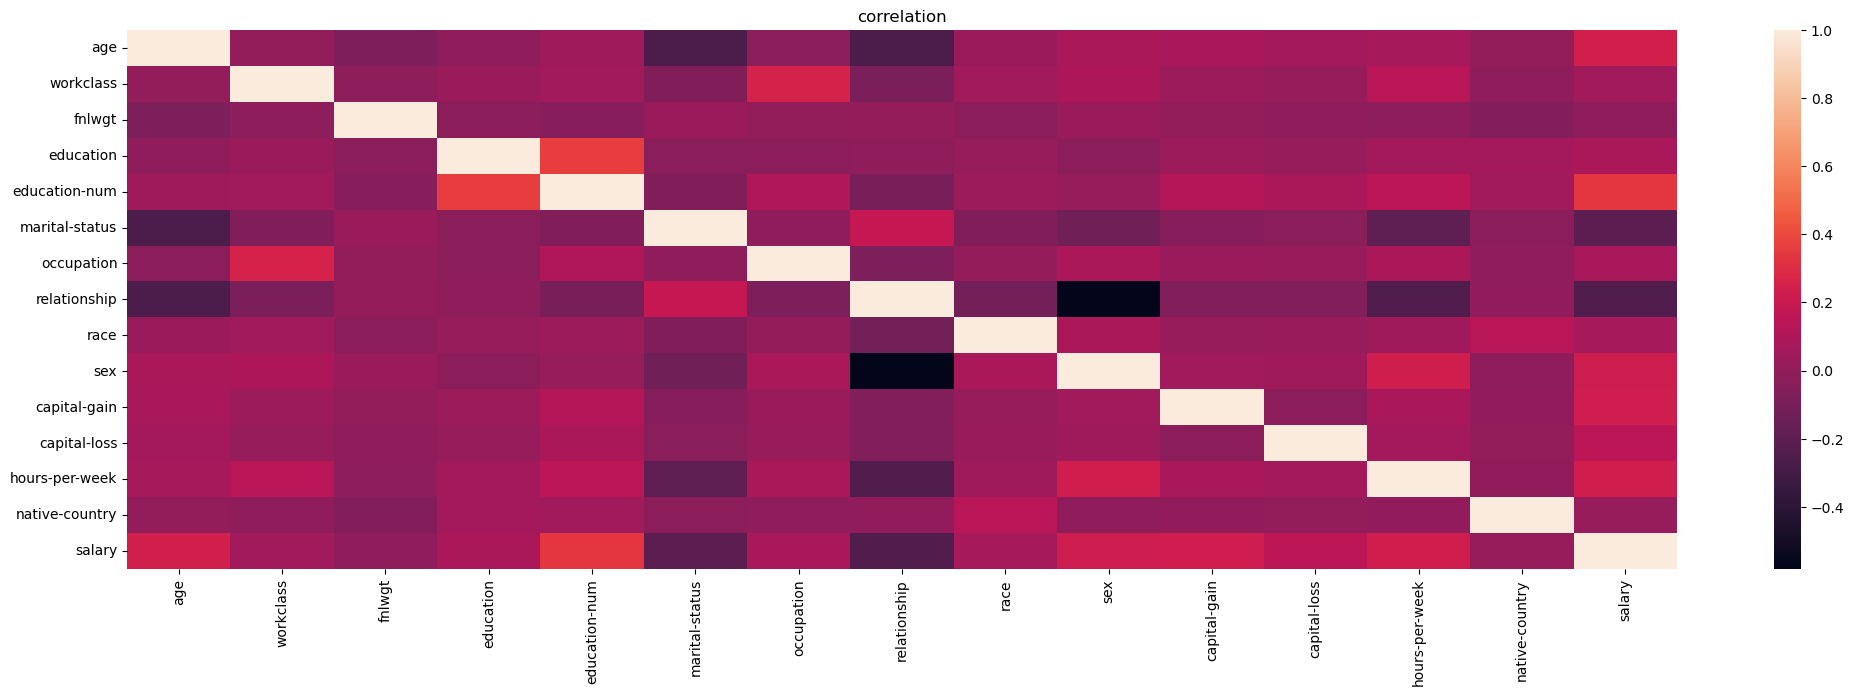

In [12]:
plt.figure(figsize=(25,7))
plt.title('correlation')
sns.heatmap(train_df.corr())
plt.show()

In [13]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
def get_vif(data):
    X = train_df.loc[:,[col for col in train_df.columns if col != 'salary']]
    y = train_df['salary']
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif.round(1)

In [15]:
#check multicollinearity among predictor variables
get_vif(train_df)

,VIF Factor,features
0,1.1,age
1,8.1,workclass
2,1.0,fnlwgt
3,8.2,education
4,1.2,education-num
5,4.2,marital-status
6,3.6,occupation
7,2.8,relationship
8,15.9,race
9,4.3,sex


In [16]:
correlation_matrix = pd.DataFrame(train_df.corr())
correlation_matrix

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
education-num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
marital-status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
sex,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980


In [17]:
#Splitting the dataset into train and test
X = train_df.loc[:,[col for col in train_df.columns if col != 'salary']]
y = train_df['salary']
y.value_counts()/len(y)*100

salary
0    75.919044
1    24.080956
Name: count, dtype: float64

In [18]:
# Select features with absolute correlation coefficients greater than a threshold
threshold = 0.1  # Adjust threshold as needed
selected_features = correlation_matrix['salary'][abs(correlation_matrix['salary']) > threshold].index.tolist()

# Print selected features
print("Selected Features:")
print(selected_features)


Selected Features:
['age', 'education-num', 'marital-status', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'salary']


In [20]:
# Select only the chosen features
from sklearn.model_selection import train_test_split

X_selected = X[selected_features[:-1]]  # Exclude the target variable
y = train_df['salary']

# Split the selected data into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [21]:
#lets apply resampling to balance the data
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE resampling on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE


# Define models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
svm_classifier = SVC()

# Define hyperparameter grids for each model
param_grid_logistic_regression = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']  # Only 'l2' penalty
}

param_grid_random_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gradient_boosting = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Define GridSearchCV for each model
grid_search_logistic_regression = GridSearchCV(logistic_regression, param_grid_logistic_regression, cv=5, scoring='accuracy')
grid_search_random_forest = GridSearchCV(random_forest, param_grid_random_forest, cv=5, scoring='accuracy')
grid_search_gradient_boosting = GridSearchCV(gradient_boosting, param_grid_gradient_boosting, cv=5, scoring='accuracy')
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='accuracy')

# Perform GridSearchCV for each model
grid_search_logistic_regression.fit(X_train_resampled, y_train_resampled)
grid_search_random_forest.fit(X_train_resampled, y_train_resampled)
grid_search_gradient_boosting.fit(X_train_resampled, y_train_resampled)
grid_search_svm.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters and retrain the models
best_params_logistic_regression = grid_search_logistic_regression.best_params_
best_params_random_forest = grid_search_random_forest.best_params_
best_params_gradient_boosting = grid_search_gradient_boosting.best_params_
best_params_svm = grid_search_svm.best_params_

best_model_logistic_regression = LogisticRegression(**best_params_logistic_regression)
best_model_random_forest = RandomForestClassifier(**best_params_random_forest)
best_model_gradient_boosting = GradientBoostingClassifier(**best_params_gradient_boosting)
best_model_svm = SVC(**best_params_svm)

best_model_logistic_regression.fit(X_train_resampled, y_train_resampled)
best_model_random_forest.fit(X_train_resampled, y_train_resampled)
best_model_gradient_boosting.fit(X_train_resampled, y_train_resampled)
best_model_svm.fit(X_train_resampled, y_train_resampled)

# Store the best models
best_models = {
    'Logistic Regression': best_model_logistic_regression,
    'Random Forest': best_model_random_forest,
    'Gradient Boosting': best_model_gradient_boosting,
    'Support Vector Machine': best_model_svm
}


In [25]:
best_models

{'Logistic Regression': LogisticRegression(C=0.1),
 'Random Forest': RandomForestClassifier(min_samples_split=10, n_estimators=50),
 'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.5, max_depth=5, n_estimators=200),
 'Support Vector Machine': SVC(C=10)}